In [1]:
# Gene: RNF168 ENSG00000163961
# Transcript ID	Name	bp	Protein	Biotype	CCDS	UniProt Match	RefSeq Match	Flags
# ENST00000318037.3	RNF168-201	5347	571aa	Protein coding
# ENST00000437070.1	RNF168-202	2202	116aa	Nonsense mediated decay

In [2]:
import pandas, numpy

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':16, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*2/3, 9*2/3), 
                            'axes.labelsize':16
                           })

# user-defined variables

In [4]:
control_input_file = '/Users/adrian/research/oskjuhlid/results/inference/inference_control/data.site_proba.csv'
fto_input_file = '/Users/adrian/research/oskjuhlid/results/inference/inference_fto/data.site_proba.csv'

# read information

In [5]:
df_control = pandas.read_csv(control_input_file, sep=',', index_col=0)
df_fto = pandas.read_csv(fto_input_file, sep=',', index_col=0)

print(df_control.shape)
print(df_fto.shape)

(501680, 5)
(793520, 5)


# comparison

In [6]:
# each transcript, report as x the mean modification difference and y as the abs sum differential modifications
# consider working with probability_modified instead mod_ratio because of quality scores? may need to check/follow up

all_transcripts = list(set(df_control.index) & set(df_fto.index))
all_transcripts.sort()
print(len(all_transcripts))

x = []; y = []

for i in range(1000):
    transcript = all_transcripts[i]
    #print(transcript)

    ss_control = df_control.loc[transcript, ]
    ss_fto = df_fto.loc[transcript, ]

    if (isinstance(ss_control, pandas.DataFrame) == False) | (isinstance(ss_fto, pandas.DataFrame) == False): # ENST00000219345.10        
        print('\t dropping {} because of lack of data'.format(transcript))
    else:
        
        common_locations = list(set(ss_control['transcript_position']) & set(ss_fto['transcript_position']))
        
        common_locations.sort()
    
        cdf_control = ss_control[ss_control['transcript_position'].isin(common_locations)]
        cdf_fto = ss_fto[ss_fto['transcript_position'].isin(common_locations)]
    
        probs_control = cdf_control['probability_modified']
        probs_fto = cdf_fto['probability_modified']
        
        if numpy.max(probs_fto) > 1:
            raise ValueError('probability higher than one')
    
        methylation_differences = probs_fto.sub(probs_control)
    
        locations_found = methylation_differences.shape[0]
        sum_abs_differences = numpy.sum(numpy.abs(methylation_differences)) / locations_found
        mean_differences = numpy.mean(methylation_differences)
    
        x.append(mean_differences); y.append(sum_abs_differences)

21912
	 dropping ENST00000219345.10 because of lack of data
	 dropping ENST00000223865.8 because of lack of data
	 dropping ENST00000227471.7 because of lack of data
	 dropping ENST00000227495.10 because of lack of data
	 dropping ENST00000230990.7 because of lack of data
	 dropping ENST00000232501.8 because of lack of data
	 dropping ENST00000233121.7 because of lack of data
	 dropping ENST00000234091.8 because of lack of data
	 dropping ENST00000239223.4 because of lack of data
	 dropping ENST00000242323.8 because of lack of data
	 dropping ENST00000243082.4 because of lack of data
	 dropping ENST00000249504.7 because of lack of data
	 dropping ENST00000251166.9 because of lack of data
	 dropping ENST00000252999.7 because of lack of data
	 dropping ENST00000253861.5 because of lack of data
	 dropping ENST00000256108.10 because of lack of data
	 dropping ENST00000256720.6 because of lack of data
	 dropping ENST00000258281.7 because of lack of data


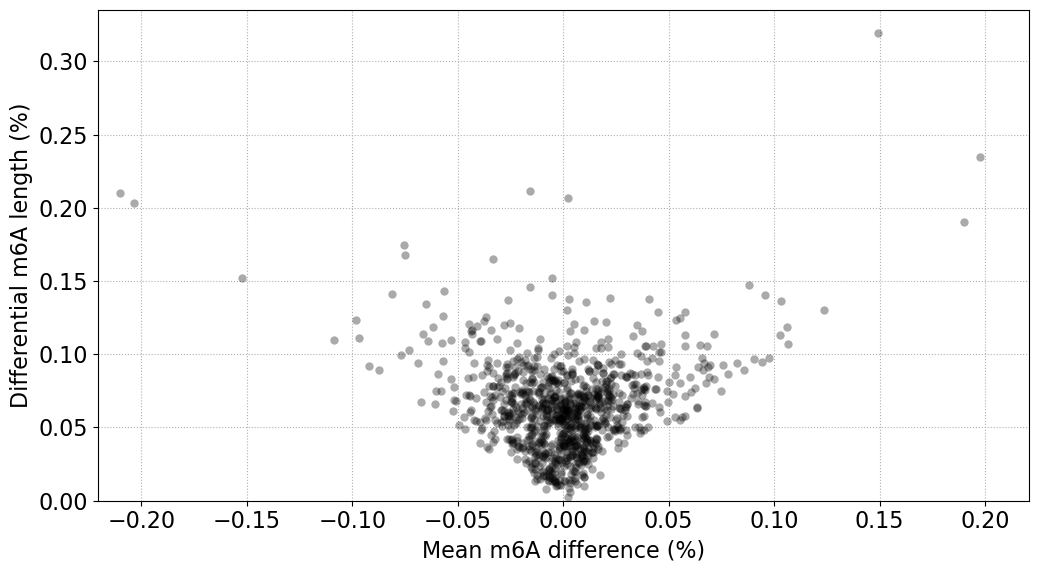

In [10]:
matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/3, mew=0)

limit = numpy.max(numpy.abs(x))
border = limit + 0.05*limit
matplotlib.pyplot.xlim(-border, border)
top_length = numpy.max(y)
matplotlib.pyplot.ylim(0, top_length + 0.05*top_length)

matplotlib.pyplot.xlabel('Mean m6A difference (%)')
matplotlib.pyplot.ylabel('Differential m6A length (%)')

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()